In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from ctypes import *
drs4lib=CDLL('./lib/libdrs4.so')

In [3]:
fname='data/p3_testrun1486/events.dat'

In [10]:
start_eventID=9000
end_evetID=start_eventID+2
num=(end_evetID-start_eventID+1)*4*1024*2

In [11]:
s_id=c_int(start_eventID)
e_id=c_int(end_evetID)
arr_type=c_double*num
_waveformData=arr_type()
status=drs4lib.get_event_adcSave(fname.encode('utf-8'),_waveformData,s_id,e_id)
waveformData=np.ctypeslib.as_array(_waveformData)
waveformData=waveformData.reshape((end_evetID-start_eventID+1),4,1024,2)

In [12]:
status

2

In [7]:
dta=waveformData[0][2]

In [8]:
dt=np.transpose(dta)

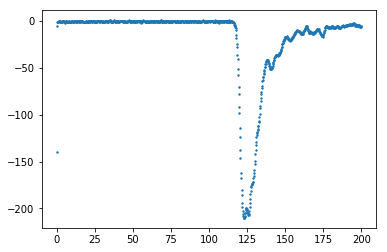

In [9]:
plt.scatter(dt[0],dt[1],s=2)

In [11]:
waveformData[100]

IndexError: index 100 is out of bounds for axis 0 with size 3

## **ADC Verification **

In [14]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import drs4lib as drs
import time

In [17]:
status,wd=drs.get_adc_events(fname,0,100)
if status!=0:
    print("ERROR !! ecode = ",status)
print(wd.nbytes/1024**2 ," MB occupied")

return status =  0
6.3125  MB occupied
6.3125  MB occupied


## **Read Data**

#### **read cliberation**

ch id : 0

ch id : 1

ch id : 2

ch id : 3



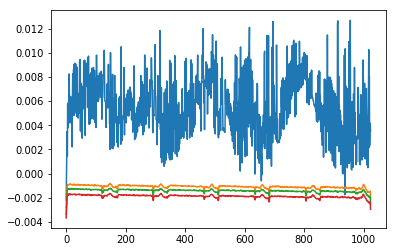

In [3]:
f=open('calib/offset_calib.txt','r')
l=f.readline()
channel_offset=dict()
while l:
    if l[0:2]=='ch':
        s=int(l[1:-1].split(':')[1])
        channel_offset.update({s:[]})
        print(l)
        l=f.readline()
        continue
    item=l[:-1].split(',')
    drs_bin=int(item[0])
    offset=float(item[1])
    channel_offset[s].append(offset)
    l=f.readline()
for s in channel_offset:
    channel_offset[s]=np.array(channel_offset[s])
for s in channel_offset:
    plt.plot([i for i in range(len(channel_offset[s]))],channel_offset[s])

In [5]:
tic=time.clock()
fname="../../data/pedrun2A.dat"
status,wd=drs.get_events(fname,0,1000)
if status==False:
    print "break"
toc=time.clock()
print "time elapsed  = ",toc-tic

0
(62, ' MB occupied')
time elapsed  =  5.388084


## **Plot Event**

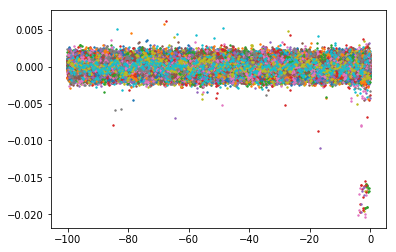

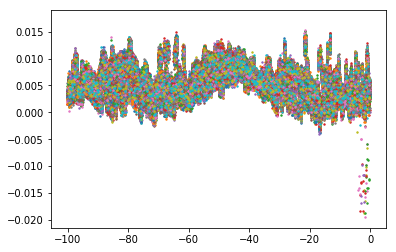

In [7]:
eventID=0
end=-1
start=-512 #end-100
for eventID in range(500):
    chID=0
    dta=np.transpose(wd[eventID][chID])-channel_offset[chID]
    dta[0]=dta[0]-dta[0][-1]
    plt.scatter(dta[0][start:end],dta[1][start:end],s=2)
plt.figure()
for eventID in range(500):
    chID=0
    dta=np.transpose(wd[eventID][chID])
    dta[0]=dta[0]-dta[0][-1]
    plt.scatter(dta[0][start:end],dta[1][start:end],s=2)
      
#     plt.xlim([start,end])
# plt.ylim([1000,34000])

### **Integrate the last 'n' bins**

    The bin to start integration

In [8]:
start_bin=-100

    The bin range for the offset evaluation

In [17]:
offset_s=0
offset_e=256

    For integrating single event

In [19]:
eventID=0
chID=0
dta=np.transpose(wd[eventID][chID])
offset_val=np.average(dta[1][offset_s:offset_e])
integ=np.trapz(dta[1][start_bin:]-offset_val,dta[0][start_bin:])
print(integ/2**15/abs(start_bin))

-1.43491900599e-08


    For integrating out the whole dataset

In [22]:
integrals=[]
for i in range(len(wd)):
    eventID=i
    chID=0
    dta=np.transpose(wd[eventID][chID])
    offset_val=np.average(dta[1][offset_s:offset_e])
    integ=np.trapz(dta[1][start_bin:]-offset_val,dta[0][start_bin:])
    integrals.append(integ)
    print("for eventId ",eventID," integral = ",integ)    

('for eventId ', 0, ' integral = ', -0.047019425988322539)
('for eventId ', 1, ' integral = ', -0.038428165861564167)
('for eventId ', 2, ' integral = ', -0.042457293634254434)
('for eventId ', 3, ' integral = ', -0.036060527301591261)
('for eventId ', 4, ' integral = ', -0.044345783680958206)
('for eventId ', 5, ' integral = ', -0.047979891862609314)
('for eventId ', 6, ' integral = ', -0.041396572838752199)
('for eventId ', 7, ' integral = ', -0.040694794830116621)
('for eventId ', 8, ' integral = ', -0.043356871786613294)
('for eventId ', 9, ' integral = ', -0.03841672386275885)
('for eventId ', 10, ' integral = ', -0.040707185449131877)
('for eventId ', 11, ' integral = ', -0.037856519617438522)
('for eventId ', 12, ' integral = ', -0.045599367108712485)
('for eventId ', 13, ' integral = ', -0.041518381005802851)
('for eventId ', 14, ' integral = ', -0.037847052474004883)
('for eventId ', 15, ' integral = ', -0.03956705719807907)
('for eventId ', 16, ' integral = ', -0.042954241760

## **Histogram**

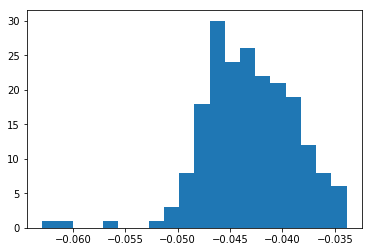

In [24]:
a=plt.hist(integrals,bins=20)

## **For larger datafiles**

In [16]:
fname="../../data/pedrun1.dat"
# fname="../data/04feb2020/data3.dat"
integ_savename=fname[:-4]+"_integrals.txt"
figsavename=fname[:-4]+"_hist.png"
SAVE_DATA=True
max_evntID=20000
nstep=1000
start_bin=0

SUBSTARCT_BASELINE=False
offset_s=0
offset_e=256
Pedestal

In [33]:
n=0
integrals=[]
if SAVE_DATA:
    f=open(integ_savename,'w')
    f.close()
while(n<max_evntID):
    tic=time.clock()
    print "doing for eventIDs  ",n," to ",n+nstep
    status,wd=drs.get_events(fname,n,n+nstep)
    if status==False:
        break
    for i in range(len(wd)):
        eventID=i
        chID=0
        dta=np.transpose(wd[eventID][chID])
        # for baseline correction
        if SUBSTARCT_BASELINE:
            offset_val=np.average(dta[1][offset_s:offset_e])
            integ=np.trapz(dta[1][start_bin:]-offset_val,dta[0][start_bin:])
        else:
            integ=np.trapz(dta[1][start_bin:],dta[0][start_bin:])
        integrals.append(integ)
        if i%500==0:
            print "\t for eventId ",eventID," integral = ",integ
    if SAVE_DATA:
        f=open(integ_savename,'a')
        for i in range(nstep):
            f.write(str(i+n)+","+str(integrals[n+i])+"\n")
        f.close()
        print "integrals saved at : ",integ_savename
    n+=nstep
    toc=time.clock()
    print "dt = ",toc-tic," estimated  time left = ", (toc-tic)*(max_evntID-n)/nstep ," s\n"
integrals=np.array(integrals)   
print "DONE !!" 

doing for eventIDs   0  to  1000
0
(62, ' MB occupied')
	 for eventId  0  integral =  1.14532850361
	 for eventId  500  integral =  1.12508497771
	 for eventId  1000  integral =  1.13477601175
integrals saved at :  ../../data/pedrun1_integrals.txt
dt =  5.969635  estimated  time left =  113.423065  s

doing for eventIDs   1000  to  2000
0
(62, ' MB occupied')
	 for eventId  0  integral =  1.13477601175
	 for eventId  500  integral =  1.13726529974
	 for eventId  1000  integral =  1.13302252413
integrals saved at :  ../../data/pedrun1_integrals.txt
dt =  6.152763  estimated  time left =  110.749734  s

doing for eventIDs   2000  to  3000
0
(62, ' MB occupied')
	 for eventId  0  integral =  1.13302252413
	 for eventId  500  integral =  1.13723425392
	 for eventId  1000  integral =  1.10524903958
integrals saved at :  ../../data/pedrun1_integrals.txt
dt =  5.432313  estimated  time left =  92.349321  s

doing for eventIDs   3000  to  4000
0
(62, ' MB occupied')
	 for eventId  0  integral 

####  **save the integrals**

In [10]:
fsavename=fname[:-4]+"_integrals.txt"
f=open(fsavename,'w')
for i in range(len(integrals)):
    f.write(str(i)+","+str(integrals[i])+"\n")
f.close()
print "integrals saved at : ",fsavename

integrals saved at :  ../data/pedrun1_integrals.txt


### **Histogram**

In [38]:
integrals2[0]

0.0

In [41]:
b=integrals

In [44]:
b[b != 0]

array([  1.14532850e+00,   1.13875940e+00,   1.12734265e+00, ...,
         1.52924000e+08,   1.70919500e+08,   1.89915000e+08])

In [39]:
integrals2=np.sort(integrals)[:-10]

max_integrals = -0.0  min_integrals  -1.24121582364
20009 items


Text(0.5,1,'Charge * R histogram for pedastal')

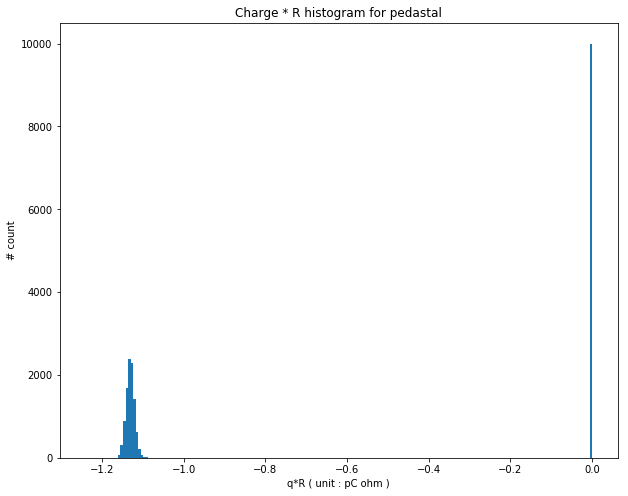

In [40]:
negated_integrals=-1*integrals2[:-1]
print "max_integrals =", max(negated_integrals)," min_integrals ",min(negated_integrals)
print len(negated_integrals),"items"
plt.figure(figsize=(10,8))
a=plt.hist(negated_integrals,bins=200)
plt.xlabel("q*R ( unit : pC ohm )")
plt.ylabel("# count")
plt.title("Charge * R histogram for pedastal")
# if SAVE_DATA:
#     plt.savefig(figsavename,dpi=600)